In [1]:
# 𝑆𝑎𝑙𝑒𝑠 = 𝑊𝑒𝑖𝑔ℎ𝑡 · 𝑅𝑎𝑑𝑖𝑜 + 𝐵𝑖𝑎s
def predict_sales(radio, weight, bias):
    return weight*radio + bias

> ## cost function 
> 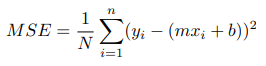

In [2]:
def cost_function(radio, sales, weight, bias):
    companies = len(radio)
    total_error = 0.0
    for i in range(companies):
        total_error += (sales[i] - (weight*radio[i] + bias))**2
    return total_error / companies

> ## Gradient descent

In [3]:
# f'(m, b) = [df/dm, df/db]  >>
# df/dm = -2xi * (yi - (mx_i + b))
# df/db = -2   * (yi - (mx_i + b))

def update_weights(radio, sales, weight, bias, learning_rate):
    companies = len(radio)
    
    # Calculate partial derivatives >> 
    # -2x(y - (mx + b)) : df/dm
    weight_deriv = -2 * sum(radio[i] * (sales[i] - (weight * radio[i] + bias)) for i in range(companies))
    # -2(y - (mx + b))  : df/db
    bias_deriv   = -2 * sum(sales[i] - (weight * radio[i] + bias) for i in range(companies))
    
    weight -= (weight_deriv / companies) * learning_rate
    bias   -= (bias_deriv   / companies) * learning_rate
    
    return weight, bias

> ## Training

In [20]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        weight, bias = update_weights(radio, sales, weight, bias, learning_rate)
        # Calculate cost for auditing purposes
        cost_history.append(cost_function(radio, sales, weight, bias))
        # Log Progress
        if i % 10 == 0:
            print(f"iter={i}  weight={weight:.2f}\tbias={bias:.4f}\tcost={cost_history[-1]:.2f}")
    return weight, bias, cost_history

-------


In [21]:
## to run project >>
import numpy as np                  # type: ignore
import matplotlib.pyplot as plt     # type: ignore

# Example data for Radio and Sales
radio = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
sales = np.array([7, 8, 9, 11, 14, 15, 16, 18, 22, 24])

# Initial weight and bias
weight = 0.5
bias   = 2

# Learning rate and iterations
learning_rate = 0.0001
iterations    = 1000

# Train the model
final_weight, final_bias, cost_history = train(radio, sales, weight, bias, learning_rate, iterations)

iter=0  weight=0.49	bias=1.9997	cost=4.22
iter=10  weight=0.44	bias=1.9993	cost=1.64
iter=20  weight=0.44	bias=2.0000	cost=1.60
iter=30  weight=0.44	bias=2.0008	cost=1.60
iter=40  weight=0.44	bias=2.0017	cost=1.60
iter=50  weight=0.44	bias=2.0025	cost=1.60
iter=60  weight=0.44	bias=2.0034	cost=1.60
iter=70  weight=0.44	bias=2.0042	cost=1.60
iter=80  weight=0.44	bias=2.0051	cost=1.59
iter=90  weight=0.44	bias=2.0059	cost=1.59
iter=100  weight=0.44	bias=2.0068	cost=1.59
iter=110  weight=0.44	bias=2.0076	cost=1.59
iter=120  weight=0.44	bias=2.0085	cost=1.59
iter=130  weight=0.44	bias=2.0094	cost=1.59
iter=140  weight=0.44	bias=2.0102	cost=1.59
iter=150  weight=0.44	bias=2.0111	cost=1.59
iter=160  weight=0.43	bias=2.0119	cost=1.59
iter=170  weight=0.43	bias=2.0128	cost=1.59
iter=180  weight=0.43	bias=2.0136	cost=1.59
iter=190  weight=0.43	bias=2.0145	cost=1.59
iter=200  weight=0.43	bias=2.0153	cost=1.59
iter=210  weight=0.43	bias=2.0162	cost=1.59
iter=220  weight=0.43	bias=2.0170	cost=1.58

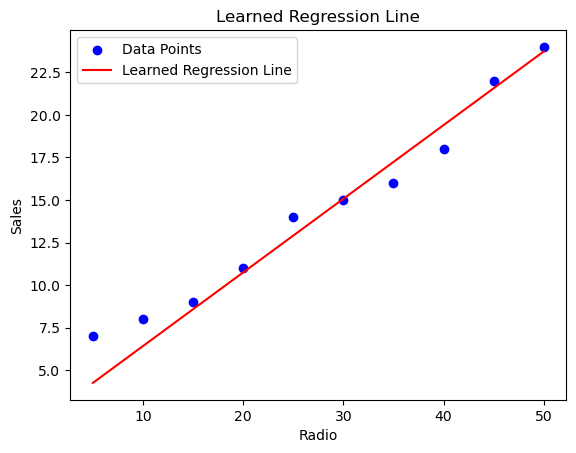

In [22]:
# Plotting the results
plt.scatter(radio, sales, color='blue', label='Data Points')
plt.plot(radio, predict_sales(radio, final_weight, final_bias), color='red', label='Learned Regression Line')
plt.title('Learned Regression Line')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

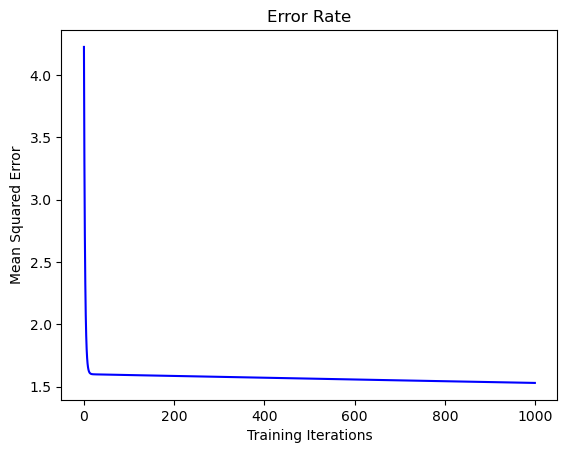

In [23]:
# Plot the cost history (Error Rate)
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Error Rate')
plt.xlabel('Training Iterations')
plt.ylabel('Mean Squared Error')
plt.show()